# **Блокнот для проверки модели**

In [ ]:
#импортируем необходимые библиотеки
import torch
import random
import pandas as pd
import numpy as np
from glob import glob
#from scripts import spym

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)

In [ ]:
from scipy import interpolate

def spline(xold, yold, xnew):
    """Spline interpolation using interpolate.CubicSpline
    xold - previous x-axis
    yold - y-data for interpolation
    xnew - new x-axis
    """
    if xold[0] > xold[-1]:
        xold = np.flipud(xold)
        yold = np.flipud(yold)
    cs = interpolate.CubicSpline(xold, yold)
    return cs(xnew)

## **Импортируем датасет**
Для ускорения загрузки и работы датасет был заранее перемешан и сформирован в две колонки: \
*Iw_norm* - сконкатенированные в один нормированные спектры до и после нелинейного взаимодействия в логарифмическом масштабе \
*Phase* - исходная спектральная фаза импульса

In [ ]:
import os
import requests
from urllib.parse import urlencode
from io import BytesIO
from zipfile import ZipFile

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/cKFCV0Z_4I6BnA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
response = requests.get(download_url)

dist_path = str(os.getcwd()+'/')
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall(path=dist_path)

In [ ]:
dataset = pd.read_pickle('Simple_AllData1mkm.pkl')

In [ ]:
dataset

,Iw_norm,Phase
0,"[-7.173206071788765, -6.248067439688921, -6.48...","[-4.083446785719934, -3.8789060673407314, -3.6..."
1,"[-7.188025160376421, -6.25558388465318, -6.505...","[-10.381189074628114, -9.762974505219404, -9.1..."
2,"[-7.1711438479901535, -6.247148365280655, -6.4...","[-5.303288121764887, -4.9842345212907215, -4.6..."
3,"[-7.195633457322558, -6.265571028669771, -6.52...","[-14.407042676483078, -13.470667414188048, -12..."
4,"[-7.196368277772776, -6.265146463284435, -6.52...","[-10.031943193905118, -9.298209866881047, -8.5..."
...,...,...
201995,"[-7.1874847052810065, -6.258618773484933, -6.5...","[-18.97986000570287, -17.69756898614764, -16.4..."
201996,"[-7.186607918480649, -6.255838716640364, -6.50...","[-5.9707741258515314, -5.5393209106848245, -5...."
201997,"[-7.187450655750165, -6.254849864903581, -6.50...","[-17.500458053811588, -16.272484726805057, -15..."
201998,"[-7.18576805980098, -6.253371851581514, -6.505...","[-3.055795200072438, -2.9161400709290364, -2.7..."


In [ ]:
new_freq = np.arange(284.5,297.5, 0.2) #частотная сетка

**Пример элементов датасета:**

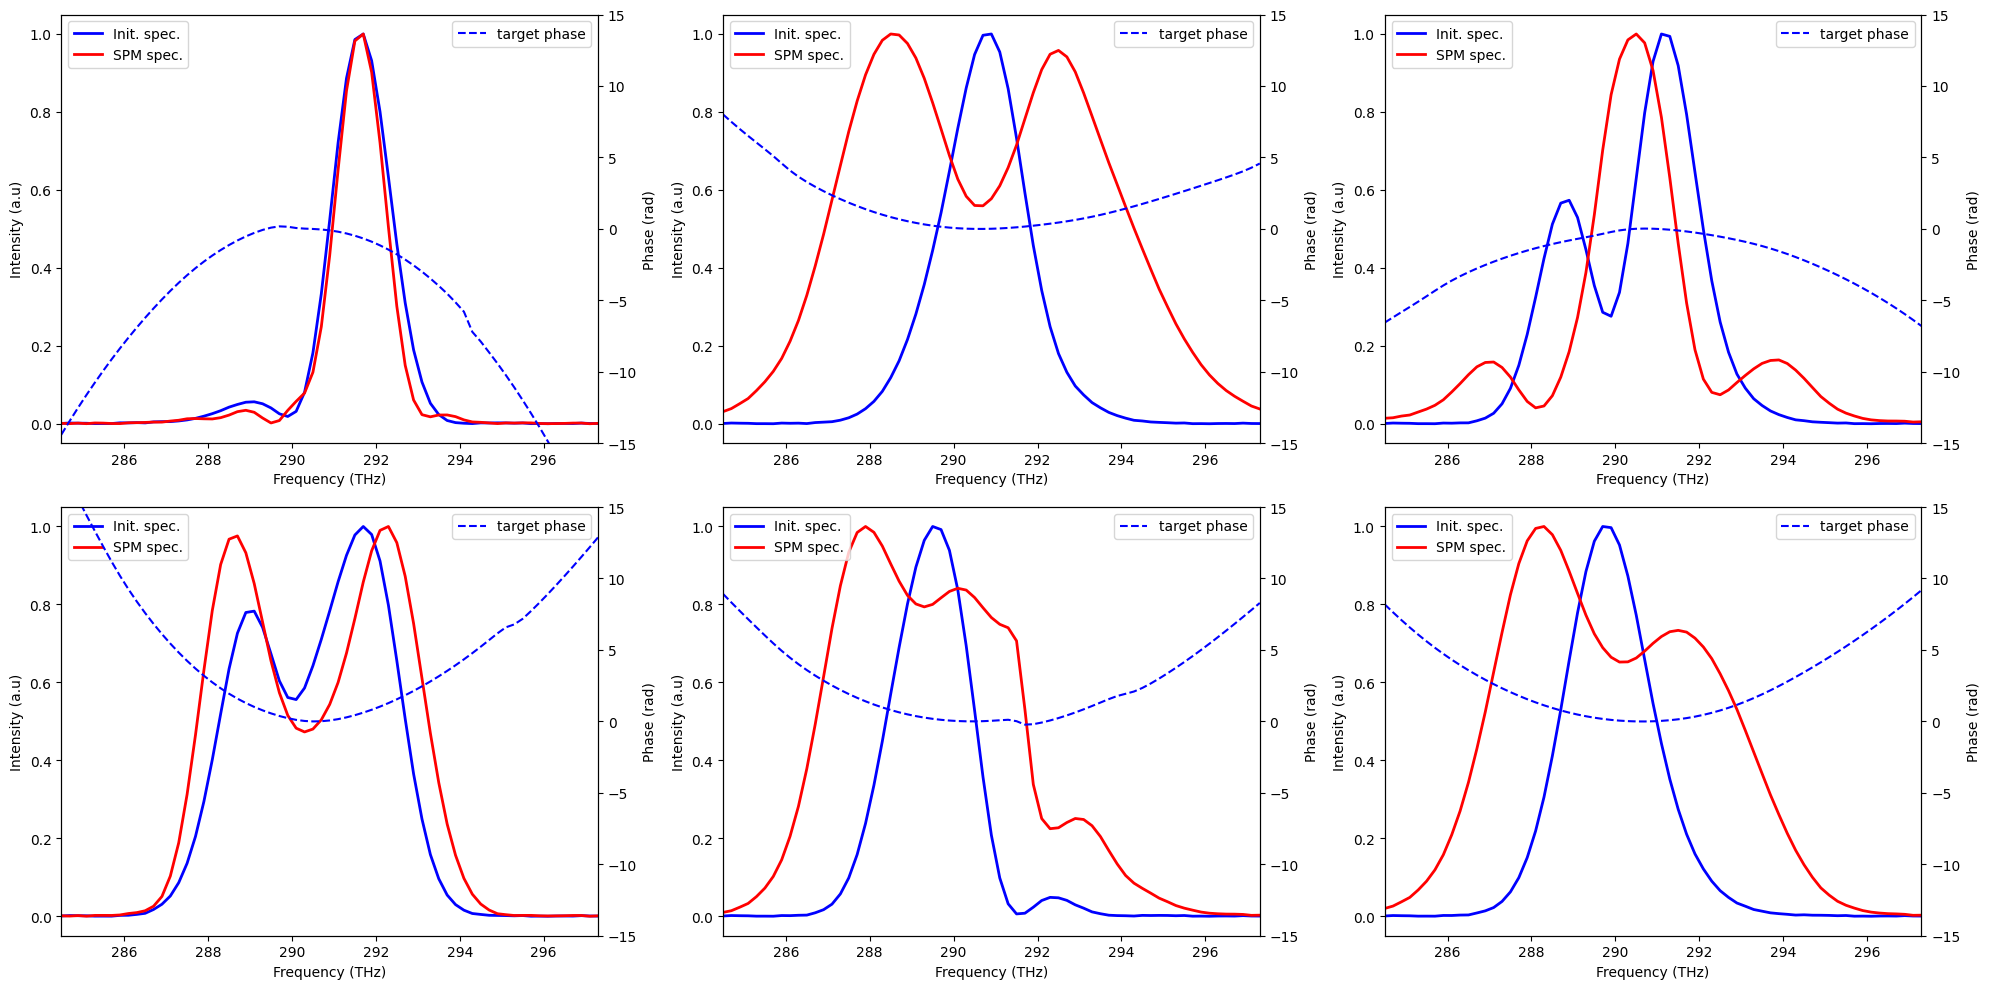

In [ ]:
fig, ax1 = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
indexes = [8, 231, 44244, 21223, 199999, 101010]
k=0
for i in range(2):
    for j in range(3):
        ax1[i][j].set_xlabel('Frequency (THz)')
        #print(k)
        ax1[i][j].set_ylabel('Intensity (a.u)')
        ax1[i][j].plot(new_freq, np.exp(dataset['Iw_norm'][indexes[k]][0:65]), color='blue', label = "Init. spec.",  lw = 2)
        ax1[i][j].plot(new_freq, np.exp(dataset['Iw_norm'][indexes[k]][65:]), color='red',label = "SPM spec.", lw = 2)
        vert_line1_coord = np.where(np.exp(dataset['Iw_norm'][indexes[k]][0:65])>1e-2)
        #ax1[i][j].axvline(x=new_freq[vert_line1_coord[0][0]], ls='-.', color='black')
        #ax1[i][j].axvline(x=new_freq[vert_line1_coord[0][-1]],ls='-.', color='black')
        #ax1.plot(wavelength_frog, spectr_frog, label = "FROG",  lw = 2)
        #ax1.tick_params(axis='y', labelcolor=color)
        ax1[i][j].set_xlim(new_freq[0], new_freq[-1])
        #ax1.set_ylim(1e-3, 1.05)
        ax1[i][j].legend(loc = 'upper left')
        #ax1.set_yscale('log')

        # #    ax1.set_xticks(np.arange(-300, 300, 50))
        # #    minorLocator = AutoMinorLocator()
        # #    ax1.xaxis.set_minor_locator(minorLocator)
        # #    ax1.tick_params(which='minor', length=3, width = 1)
        # #    ax1.tick_params(which='major', length=5, width = 1)

        ax2 = ax1[i][j].twinx()
        #color[i][j] = 'tab:blue'
        ax2.set_ylabel('Phase (rad)')
        ax2.plot(new_freq, dataset['Phase'][indexes[k]],'--', color='blue',  label = "target phase")#, 's', ms = 3, mew = 3, markevery= 1, linestyle = "None")
        #ax2.plot(new_freq, model_phase[k],'--', label = "model phase")
        #ax2.tick_params(axis='y', labelcolor=color)
        ax2.legend(loc = 'upper right')
        ax2.set_ylim(-15, 15)
        k=k+1
    #
fig.tight_layout()

plt.show()

**Разбиение датасета**

Общий размер 202 000 импульсов, из них с зафиксированным seed=42 5% отправляется на тестовую выборку \
Оставшаяся часть разбивается на тренировочную и валидационную часть в соотношение 80% на 20% \
Весь датасет нормируется на среднее и стандартное отклонение

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(torch.tensor(dataset['Iw_norm'], dtype=torch.float32), torch.tensor(dataset['Phase'], dtype=torch.float32), train_size=0.95, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42)

<ipython-input-8-6546456211a8>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  x_train, x_test, y_train, y_test = train_test_split(torch.tensor(dataset['Iw_norm'], dtype=torch.float32), torch.tensor(dataset['Phase'], dtype=torch.float32), train_size=0.95, random_state=42)


In [ ]:
mean = torch.mean(x_train).item()
std = torch.std(x_train).item()

mean_phase = torch.mean(y_train).item()
std_phase = torch.std(y_train).item()

x_train_scaled = (x_train - mean)/std
x_val_scaled = (x_val - mean)/std
x_test_scaled = (x_test - mean)/std

y_train_scaled = (y_train - mean_phase)/std_phase
y_val_scaled = (y_val - mean_phase)/std_phase
y_test_scaled = (y_test - mean_phase)/std_phase

trainset = torch.utils.data.TensorDataset(x_train_scaled, y_train_scaled)
valset = torch.utils.data.TensorDataset(x_val_scaled, y_val_scaled)
testset = torch.utils.data.TensorDataset(x_test_scaled, y_test_scaled)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)#, num_workers = 5) # Здесь можно указать параметр num_workers для ускорения обучения
val_loader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=False)#, num_workers = 5) #Здесь можно указать параметр num_workers для ускорения обучения
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)#, num_workers = 5) #Здесь можно указать параметр num_workers для ускорения обучения

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## **Модель**

### **Архитектура модели**

In [ ]:
from torch import nn

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.core = nn.Sequential(
            nn.Linear(130, 500),
            nn.ReLU(),
            nn.BatchNorm1d(500),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.BatchNorm1d(500),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.BatchNorm1d(500),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.BatchNorm1d(500),
            nn.Linear(500, 65)
        )

    def forward(self, x):
        return self.core(x)

SimpleModel()

SimpleModel(
  (core): Sequential(
    (0): Linear(in_features=130, out_features=500, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=500, out_features=500, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=500, out_features=500, bias=True)
    (10): ReLU()
    (11): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=500, out_features=65, bias=True)
  )
)

### **Целевая метрика и lightning модель для обучения**

Я использую свою целевую метрику **Peak_Error_tensor**, функция потерь - **MSE**

In [ ]:
def Peak_Error_tensor(freq, intensity, true_phase, pred_phase):
    """
    Вычисление ошибки по значению пиковой интенсивности при восстановлении
    временного профиля из правильной фазы и фазы модели
    Сделано через torch

    Параметры:
        freq - входная частотная сетка,
        intensity - спектральная интенсивность,
        true_phase - правильная спектральная фаза
        pred_phase - модельная спектральная фаза к сравнению

    Результат:
        ошибка между максимальной интенсивностью от правильной фазы и модельной
    """

    field_0 = torch.sqrt(torch.exp(intensity))*torch.exp(true_phase*1.j)
    field_1 = torch.sqrt(torch.exp(intensity))*torch.exp(pred_phase*1.j)
    field_0_t = torch.fft.ifftshift(torch.fft.ifft(torch.fft.fftshift(field_0)))
    field_1_t = torch.fft.ifftshift(torch.fft.ifft(torch.fft.fftshift(field_1)))
    true_max = torch.max(torch.abs(field_0_t)**2)
    model_max = torch.max(torch.abs(field_1_t)**2)
    model_error = torch.abs((model_max - true_max) / true_max)
    return model_error

class XSigmoidLoss(torch.nn.Module): # Эта одна из альтернативных функций потерь, но оптимальной себя в этой задаче показала именно MSE
    def __init__(self):
        super().__init__()

    def forward(self, y_t, y_prime_t):
        ey_t = y_t - y_prime_t
        return torch.mean(2 * ey_t / (1 + torch.exp(-ey_t)) - ey_t)

In [ ]:
class Peak_Error_Metric: #этот класс рассчитывает метрику пиковой интенсивности для батча из функции Peak_Error_tensor
    values = None

    def __init__(self, metric):
        self.reset()
        self.metric = metric

    def compute(self):
        return torch.Tensor(self.values).mean()

    def update(self, pred, target, freq, intensity):
        for i in range(pred.shape[0]):
            metric_val = self.metric(freq, intensity[i,0:65], target[i,:], pred[i,:])
            self.values.append(metric_val)

    def reset(self):
        self.values = []


In [ ]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 48.2 MB/s eta 0:00:00


In [ ]:
import lightning as L

from torchmetrics import MetricCollection, MeanAbsoluteError,  MeanSquaredError

class LModel(L.LightningModule):
    def __init__(self, model, freq, mean_int, std_int, mean_phase, std_phase, lr=0.001, gamma=0.9):
        super().__init__()
        self.save_hyperparameters(logger=False)

        # for optimizer and shaduler
        self.lr = lr
        self.gamma = gamma

        # model
        self.model = model
        self.criterion = MeanSquaredError()

        # metrics
        self.train_metrics = Peak_Error_Metric(Peak_Error_tensor)
        self.val_metrics = Peak_Error_Metric(Peak_Error_tensor)
        self.test_metrics = Peak_Error_Metric(Peak_Error_tensor)
        self.freq = freq
        self.mean_int = mean_int
        self.std_int = std_int
        self.mean_phase = mean_phase
        self.std_phase = std_phase

    def configure_optimizers(self):
        # set optimizer
        optimizer = torch.optim.AdamW(
            self.model.parameters(),
            lr=self.lr,
        )
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
        )
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "epoch",  # or 'step'
                "monitor": "loss" # only for self.log
            },
        }

    #torch


    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        loss = self.criterion(out, y)
        self.train_metrics.update(pred=out*std_phase+mean_phase, target=y*std_phase+mean_phase, freq=freq, intensity=x*std_int+mean_int)
        self.log("loss", loss, prog_bar=False)
        self.log("lossMSE/train", loss, prog_bar=False)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        loss = self.criterion(out, y)
        self.val_metrics.update(pred=out*std_phase+mean_phase, target=y*std_phase+mean_phase, freq=freq, intensity=x*std_int+mean_int)
        self.log("lossMSE/val", loss, prog_bar=False)

    def on_train_epoch_end(self):
        self.log('Peak/train', self.train_metrics.compute())
        self.train_metrics.reset()
        self.log('Peak/val', self.val_metrics.compute())
        self.val_metrics.reset()

    def test_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        self.test_metrics.update(pred=out*std_phase+mean_phase, target=y*std_phase+mean_phase, freq=freq, intensity=x*std_int+mean_int)

    def on_test_epoch_end(self):
        self.log('Peak/test', self.test_metrics.compute())
        self.test_metrics.reset()

### **Код для обучения модели**

Для его выполнения следует раскомментировать блок ниже. Для проверки результата можно загрузить уже обученную модель в блоках ниже.

In [ ]:
# from lightning.pytorch.callbacks import ModelCheckpoint

# checkpoint_callback = ModelCheckpoint(
#     # dirpath='best_ckp/'
#     save_last=True,
#     every_n_epochs=1,
#     save_top_k=1,
#     save_weights_only=True,
#     monitor="Peak/val",
#     filename="model",
#     mode="min",
# )


# freq =new_freq
# mean_int, std_int, mean_phase, std_phase = torch.tensor(mean), torch.tensor(std), torch.tensor(mean_phase), torch.tensor(std_phase)

# L.seed_everything(42)

# model = SimpleModel()

# pl_model = LModel(model, freq,mean_int, std_int, mean_phase, std_phase)
# trainer = L.Trainer(
#     max_epochs=80,
#     callbacks=[checkpoint_callback],
#     #num_sanity_val_steps=0,
#     log_every_n_steps=155,
#     logger=L.pytorch.loggers.TensorBoardLogger(save_dir="./new_dataset_x2_log_MSE/"),
# )

# trainer.fit(
#     model=pl_model,
#     train_dataloaders=train_loader,
#     val_dataloaders=val_loader
# )
# trainer.test(model=pl_model, dataloaders=test_loader, ckpt_path="best")

### **Загрузим обученную модель**

In [ ]:
#Загрузим модель из яндекс диска (работает в яндекс датасфере)

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/30OP3_Ed-MYOGA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
response = requests.get(download_url)

dist_path = str(os.getcwd()+'/')
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall(path=dist_path)

ckpt_list = glob(dist_path+"/lightning_logs/version_4/checkpoints/*")
ckpt_list.sort()
ckpt_path = ckpt_list[-1]# Your code here
map_location=torch.device('cpu')
checkpoint = torch.load(ckpt_path, map_location=map_location, weights_only=False)

checkpoint_dict = torch.load(ckpt_path,map_location=map_location, weights_only=False)
model = checkpoint_dict["hyper_parameters"]["model"]
print(model)

SimpleModel(
  (core): Sequential(
    (0): Linear(in_features=130, out_features=500, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=500, out_features=500, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=500, out_features=500, bias=True)
    (10): ReLU()
    (11): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=500, out_features=65, bias=True)
  )
)


<ipython-input-17-2b516f2a0d54>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=map_location)
<ipython-input-17-2b516f2a0d5

## **Результаты**

### **Проверка на тестовом датасете**

**Построим несколько репрезентативных примеров работы на тестовой выборке**

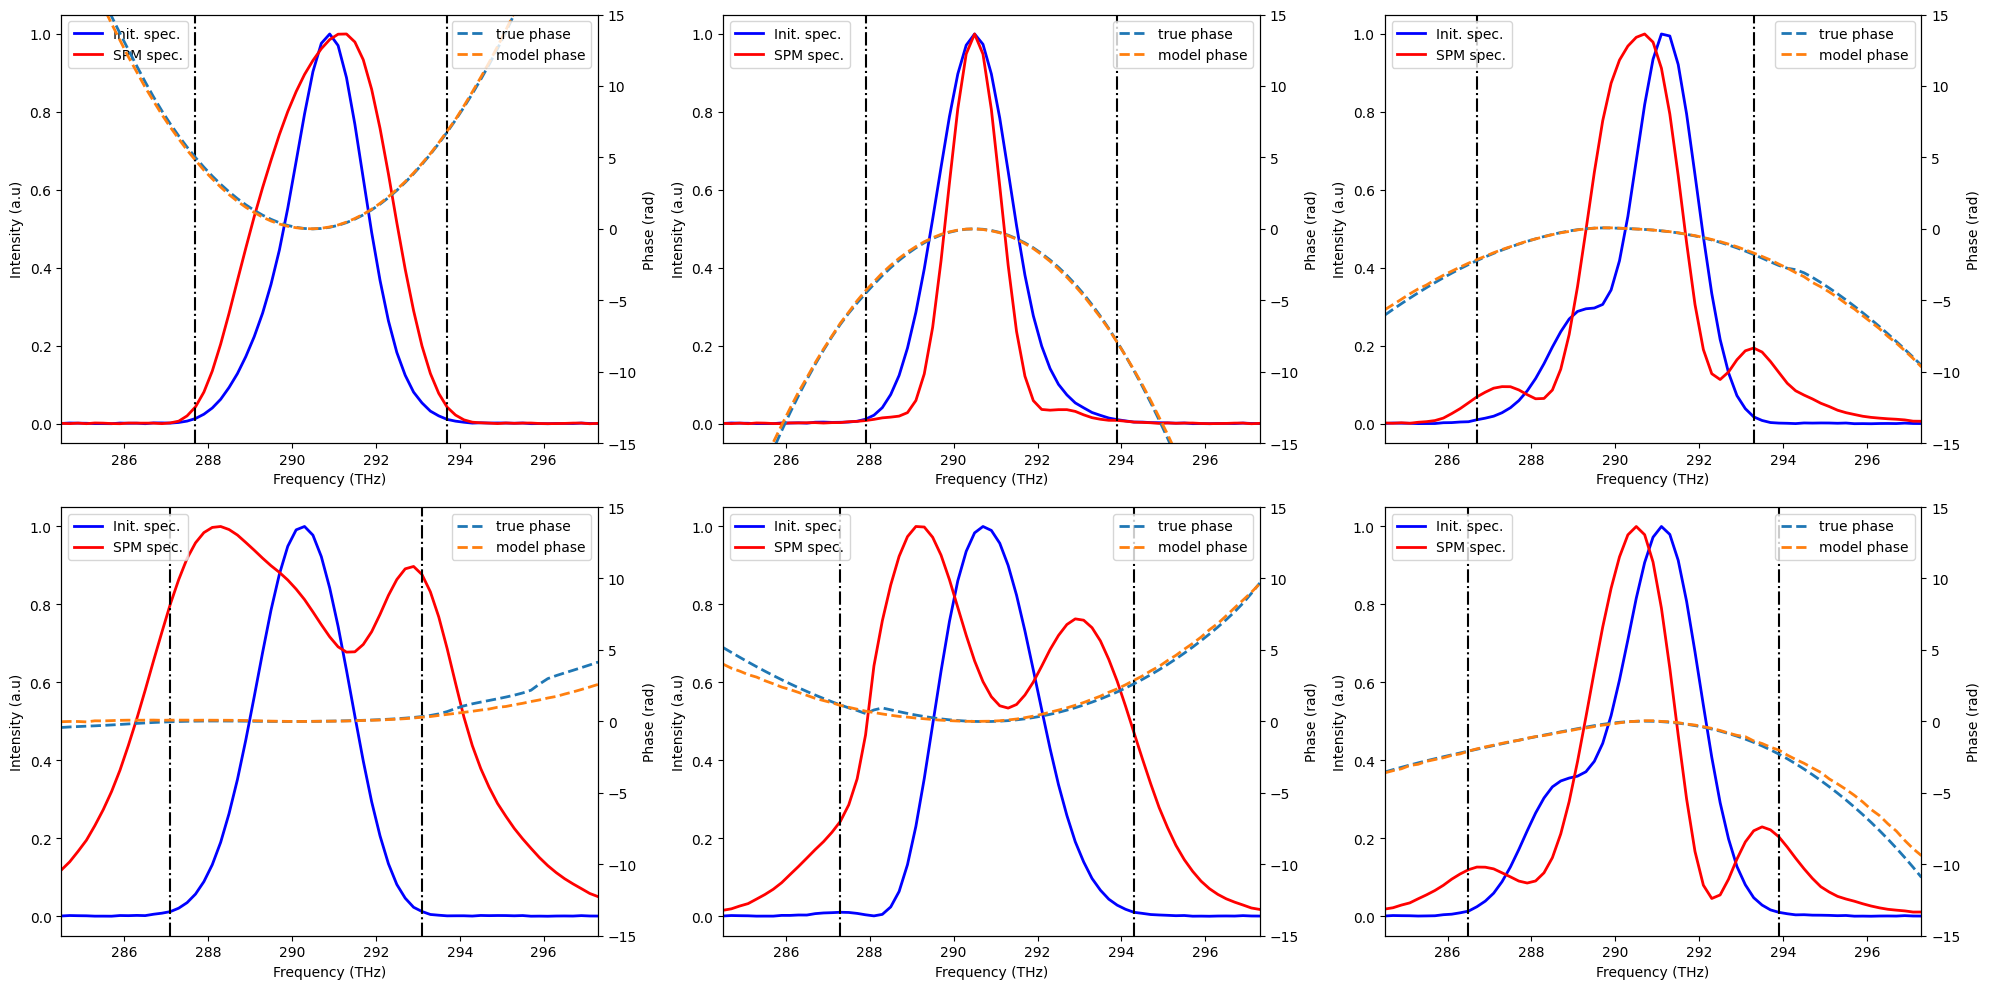

In [ ]:
index_reference = [166, 9015, 3061, 5808, 9557, 7240, 1557]
model_phase = np.zeros((len(index_reference),65))
model.eval()
i=0
for idx in index_reference:
    x = x_test_scaled[index_reference[i]].unsqueeze(0)#.cuda()
    model_phase[i] = model(x).squeeze(0).cpu().detach().numpy() * std_phase + mean_phase
    i=i+1

fig, ax1 = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
k=0
for i in range(2):
    for j in range(3):
        ax1[i][j].set_xlabel('Frequency (THz)')
        #print(k)
        ax1[i][j].set_ylabel('Intensity (a.u)')
        ax1[i][j].plot(new_freq, np.exp(x_test[index_reference[k]][0:65]), color='blue', label = "Init. spec.",  lw = 2)
        ax1[i][j].plot(new_freq, np.exp(x_test[index_reference[k]][65:]), color='red',label = "SPM spec.", lw = 2)
        vert_line1_coord = np.where(np.exp(x_test[index_reference[k]][0:65])>1e-2)
        ax1[i][j].axvline(x=new_freq[vert_line1_coord[0][0]], ls='-.', color='black')
        ax1[i][j].axvline(x=new_freq[vert_line1_coord[0][-1]],ls='-.', color='black')
        #ax1.plot(wavelength_frog, spectr_frog, label = "FROG",  lw = 2)
        #ax1.tick_params(axis='y', labelcolor=color)
        ax1[i][j].set_xlim(new_freq[0], new_freq[-1])
        #ax1.set_ylim(1e-3, 1.05)
        ax1[i][j].legend(loc = 'upper left')
        ax2 = ax1[i][j].twinx()
        #color[i][j] = 'tab:blue'
        ax2.set_ylabel('Phase (rad)')
        ax2.plot(new_freq, y_test[index_reference[k]],'--',  label = "true phase",  lw = 2)#, 's', ms = 3, mew = 3, markevery= 1, linestyle = "None")
        ax2.plot(new_freq, model_phase[k],'--', label = "model phase",  lw = 2)
        #ax2.tick_params(axis='y', labelcolor=color)
        ax2.legend(loc = 'upper right')
        ax2.set_ylim(-15, 15)
        k=k+1
    #
fig.tight_layout()

plt.show()

Здесь вертикальные штрих-пунктирные линии обозначают область физически значимой фазы (по уровне -20dB относительно максимума спектра) \

**Синяя прерывистая** - спектральная фаза из датасета (таргет), **оранжевая прерывистая** - фаза, восстановленная моделью



**Построим распределене ошибок пиковой интенсивности и длительности FWHM по тестовому датасету**

In [ ]:
def FWHM_calc(freq_input, intensity, true_phase):
    """
    Вычисление значения длительности импульса FWHM при восстановлении
    временного профиля
    Сделано через numpy

    Параметры:
        freq_input - входная частотная сетка,
        intensity - спектральная интенсивность,
        true_phase - спектральная фаза

    Результат:
        длительность импульса FWHM в фемтосекундах
    """
    freq_input=freq_input*1e12
    freq_min = np.min(freq_input)
    freq_max = np.max(freq_input)

    #New frequency grid starting from zero and linear
    N = 2**15
    T = 5000*1e-15
    dt = 2*T/(N)
    time = np.arange(-T, T, dt)
    df = 1 / 2 / T
    F = 1 / 2 / dt
    freq = np.arange(-F, F, df)
    #this filter is need to proper interpolate electric field on the new denser and larger time grid
    f_filter = (freq >= freq_min) * (freq <= freq_max)

    #shifting Electric field and phase to the new grid
    intensity_= spline(freq_input, intensity, freq) * f_filter
    int_filter = intensity_ >= 0
    intensity_ = intensity_*int_filter
    intensity_ = (intensity_ - np.min(intensity_))/np.max(intensity_ - np.min(intensity_))
    true_phase_ = spline(freq_input, true_phase, freq) * f_filter
    Ew_true = np.sqrt(np.abs(intensity_))*np.exp(1j*true_phase_)
    E_time_true = np.fft.ifftshift(np.fft.ifft(Ew_true))
    intensity_temp_true = np.abs(E_time_true)**2/max(np.abs(E_time_true)**2)
    tshft = time - time[np.where(intensity_temp_true==intensity_temp_true.max())]
    fwhm_true = tshft[intensity_temp_true>0.5][-1] - tshft[intensity_temp_true>0.5][0]

    return fwhm_true*1e15

In [ ]:
def Peak_Error_calc(freq_input, intensity, true_phase, pred_phase):
    """
    Вычисление ошибки по значению пиковой интенсивности при восстановлении
    временного профиля из правильной фазы и фазы модели
    Сделано через numpy

    Параметры:
        freq_input - входная частотная сетка,
        intensity - спектральная интенсивность,
        true_phase - правильная спектральная фаза
        pred_phase - модельная спектральная фаза к сравнению

    Результат:
        ошибка между максимальной интенсивностью от правильной фазы и модельной
    """

    freq_input=freq_input*1e12
    freq_min = np.min(freq_input)
    freq_max = np.max(freq_input)

    #New frequency grid starting from zero and linear
    N = 2**15
    T = 5000*1e-15
    dt = 2*T/(N)
    time = np.arange(-T, T, dt)
    df = 1 / 2 / T
    F = 1 / 2 / dt
    freq = np.arange(-F, F, df)

    #this filter is need to proper interpolate electric field on the new denser and larger time grid
    f_filter = (freq >= freq_min) * (freq <= freq_max)

    #shifting Electric field and phase to the new grid
    intensity_= spline(freq_input, intensity, freq) * f_filter
    int_filter = intensity_ >= 0
    intensity_ = intensity_*int_filter
    intensity_ = (intensity_ - np.min(intensity_))/np.max(intensity_ - np.min(intensity_))
    true_phase_ = spline(freq_input, true_phase, freq) * f_filter
    pred_phase_ = spline(freq_input, pred_phase, freq) * f_filter
    Ew_true = np.sqrt(np.abs(intensity_))*np.exp(1j*true_phase_)
    Ew_pred = np.sqrt(np.abs(intensity_))*np.exp(1j*pred_phase_)

    #FFT and retrieving Electric field and time phase
    E_time_true = np.fft.ifftshift(np.fft.ifft(Ew_true))
    E_time_pred = np.fft.ifftshift(np.fft.ifft(Ew_pred))

    #retrieving temporal intensity
    intensity_temp_true = np.abs(E_time_true)**2
    intensity_temp_pred = np.abs(E_time_pred)**2
    peak_error = np.abs(intensity_temp_true.max() - intensity_temp_pred.max()) / intensity_temp_true.max()

    return peak_error

Для экономии времени я закомментировал код расчёта распределения ошибок, но при желании его можно выполнить (обычно занимает несколько минут).

In [ ]:
# results_test = []
# col_names = ['true_fwhm','model_fwhm','fwhm_error', 'model_error']
# results_test= pd.DataFrame(columns=col_names)
# model.eval()

# for idx in range(len(x_test_scaled)):
#     a = x_test_scaled[idx].unsqueeze(0).cpu()
#     model_phase = model(a).squeeze(0).cpu().detach().numpy() *std_phase.numpy()+mean_phase.numpy()
#     intensity = np.exp(x_test[idx][0:65]).detach().numpy()
#     #сделаем фильтр для работы только в физически значимой области спектра -20dB от максимума интенсивности
#     db20_filter = []
#     for i in range(len(intensity)):
#         db20_filter.append(1 if intensity[i]>1e-2 else 0)
#     db20_filter=np.array(db20_filter)
#     true_fwhm = FWHM_calc(new_freq, intensity, y_test[idx].detach().numpy()*db20_filter)
#     model_fwhm = FWHM_calc(new_freq, intensity, model_phase*db20_filter)
#     fwhm_error = np.abs((true_fwhm-model_fwhm)/true_fwhm)
#     model_error = Peak_Error_calc(new_freq, intensity, y_test[idx].detach().numpy()*db20_filter, model_phase*db20_filter)
#     d = [true_fwhm, model_fwhm, fwhm_error, model_error]
#     results_test.loc[idx] = d

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/9RTkk7e6-t9buA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
response = requests.get(download_url)

dist_path = str(os.getcwd()+'/')
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall(path=dist_path)

results_test = pd.read_pickle('Results_to_plot.pkl')

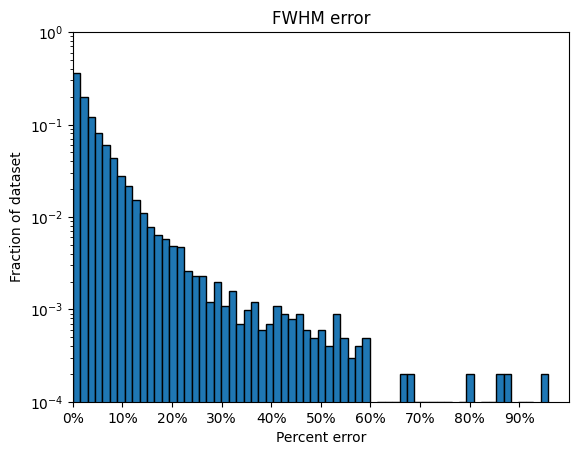

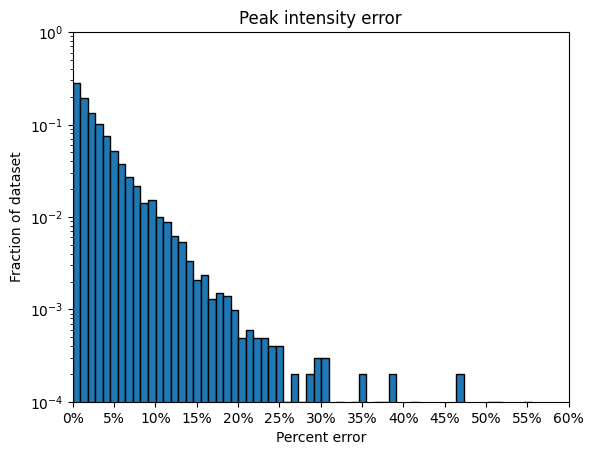

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.hist(results_test['fwhm_error'],bins=260,density=False, weights=np.ones(len(results_test)) / len(results_test), edgecolor='black')
#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().set_xlim(0,1)
plt.gca().set_xlabel('Percent error')
plt.gca().set_xticks(np.arange(0,1,0.1))
#plt.gca().set_yticks(np.arange(0,1,0.05))
plt.gca().set_yscale('log')
plt.gca().set_ylim(1e-4,1)
plt.gca().set_ylabel('Fraction of dataset')
plt.gca().set_title('FWHM error')
plt.show()


plt.hist(results_test['model_error'],bins=260,density=False, weights=np.ones(len(results_test)) / len(results_test), edgecolor='black')
#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().set_xlim(0,1)
plt.gca().set_xlabel('Percent error')
plt.gca().set_ylabel('Fraction of dataset')
plt.gca().set_xticks(np.arange(0,0.8,0.05))
plt.gca().set_xlim(0,0.6)
#plt.gca().set_yticks(np.arange(0,0.9,0.05))
plt.gca().set_yscale('log')
plt.gca().set_ylim(1e-4,1)
plt.gca().set_title('Peak intensity error')
plt.show()

In [ ]:
print('Ошибка пиковой интенсивности: ', round(results_test['model_error'].mean()*100,1),'% среднее, ', round(results_test['model_error'].std()*100,1),'% станд. отклон.')
print('Ошибка длительности FWHM: ', round(results_test['fwhm_error'].mean()*100,1),'% среднее, ', round(results_test['fwhm_error'].std()*100,1),'% станд. отклон.')

Ошибка пиковой интенсивности:  3.2 % среднее,  4.9 % станд. отклон.
Ошибка длительности FWHM:  4.9 % среднее,  9.4 % станд. отклон.


## **Проверка на данных реального эксперимента**

**Проверим на экспериментальных данных**

In [ ]:
#Загрузим данные из эксперимента:

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/f8Kx7OoPn9x8EA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
response = requests.get(download_url)

dist_path = str(os.getcwd()+'/')
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall(path=dist_path)


In [ ]:
def Plot_temporal_comparison(freq_input, intensity, model_phase, freq_frog, intensity_frog, frog_phase):
    """
    Функция построения на одном графике временных огибающих пары импульсов (второй предполагается из методики FROG)

    Параметры:
        freq_input - входная частотная сетка первого импульса,
        intensity - спектральная интенсивность первого импульса,
        true_phase - спектральная фаза первого импульса,
        freq_frog - входная частотная сетка второго импульса,
        intensity_frog - спектральная интенсивность второго импульса,
        frog_phase - спектральная фаза второго импульса,

    Результат:
        построение графиков временных интенсивностей, вывод длительности первого и второго(FROG) импульса c
        процентной ошибкой длительностей
    """
    freq_input=freq_input*1e12
    freq_min = np.min(freq_input)
    freq_max = np.max(freq_input)

    freq_input_frog=freq_frog*1e12
    freq_frog_min = np.min(freq_input_frog)
    freq_frog_max = np.max(freq_input_frog)

    #New frequency grid starting from zero and linear
    N = 2**15
    T = 5000*1e-15
    dt = 2*T/(N)
    time = np.arange(-T, T, dt)
    df = 1 / 2 / T
    F = 1 / 2 / dt
    freq = np.arange(-F, F, df)
    f_filter = (freq >= freq_min) * (freq <= freq_max)
    f_filter_frog = (freq >= freq_frog_min) * (freq <= freq_frog_max)

    #shifting Electric field and phase to the new grid
    intensity_= spline(freq_input, intensity, freq) * f_filter
    int_filter = intensity_ >= 0
    intensity_ = intensity_*int_filter
    intensity_ = (intensity_ - np.min(intensity_))/np.max(intensity_ - np.min(intensity_))

    intensity_frog_= spline(freq_input_frog, intensity_frog, freq) * f_filter_frog
    int_filter_frog = intensity_frog_ >= 0
    intensity_frog_ = intensity_frog_*int_filter_frog
    intensity_frog_ = (intensity_frog_ - np.min(intensity_frog_))/np.max(intensity_frog_ - np.min(intensity_frog_))

    model_phase_ = spline(freq_input, model_phase, freq) * f_filter
    frog_phase_ = spline(freq_input_frog, frog_phase, freq) * f_filter_frog

    Ew_model = np.sqrt(np.abs(intensity_))*np.exp(1j*model_phase_)
    Ew_freq = np.sqrt(np.abs(intensity_frog_))*np.exp(1j*frog_phase_)

    #FFT and retrieving Electric field and time phase
    E_time_model = np.fft.ifftshift(np.fft.ifft(Ew_model))
    E_time_frog = np.fft.ifftshift(np.fft.ifft(Ew_freq))

    #retrieving temporal intensity
    intensity_temp_model = np.abs(E_time_model)**2/max(np.abs(E_time_model)**2)
    intensity_temp_frog = np.abs(E_time_frog)**2/max(np.abs(E_time_frog)**2)

    tshft = time - time[np.where(intensity_temp_model==intensity_temp_model.max())]
    tshft2 = time - time[np.where(intensity_temp_frog==intensity_temp_frog.max())]

    fig, ax1 = plt.subplots()
    ax1.plot(tshft*1e15, intensity_temp_model, label = 'Model')
    ax1.plot(tshft2*1e15, intensity_temp_frog, 'g', label = 'FROG')
    fwhm_model = tshft[intensity_temp_model>0.5][-1] - tshft[intensity_temp_model>0.5][0]
    print('fwhm_model = ', round(fwhm_model*1e15), 'fs')
    fwhm_frog = tshft2[intensity_temp_frog>0.5][-1] - tshft2[intensity_temp_frog>0.5][0]
    print('fwhm_frog = ', round(fwhm_frog*1e15), 'fs')
    print('fwhm_error = ', round(100*(fwhm_model-fwhm_frog)/fwhm_frog,1), '%')

    ax1.set_xlim((-500,500))
    ax1.set_xlabel('Time (fs)')
    ax1.set_ylabel('Intensity (a.u.)')
    ax1.legend()
    return tshft*1e15, intensity_temp_model

fwhm_model =  217 fs
fwhm_frog =  213 fs
fwhm_error =  1.9 %


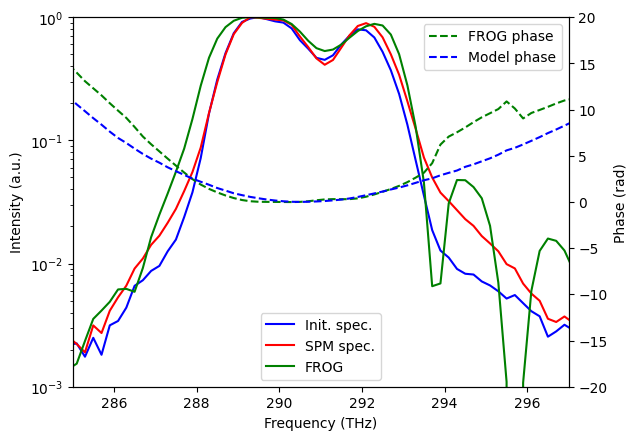

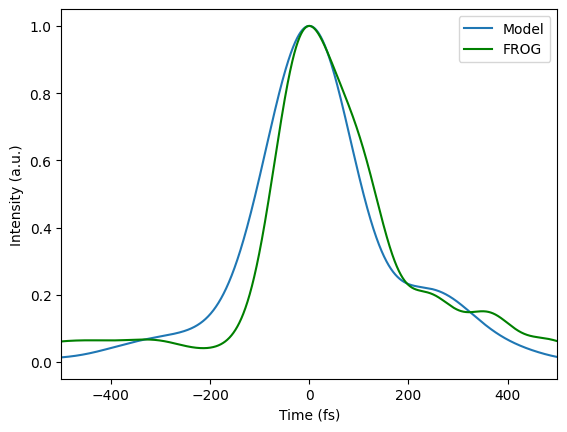

In [ ]:
files = [
    "Experiment Files/90cmOrig25Deg.txt",
    "Experiment Files/90cmSFM25Deg.txt",
    ]

wavelength = np.zeros(0)
spectras = []
for count, file in enumerate(files):
    spectrum = np.zeros(0)
    with open(file) as f:
        lines = f.readlines()

    for i in range(17, len(lines)-2):
        a = (lines[i].replace(',', '.')).strip()
        b = a.split()
        #print(b)
        if count == 0:
            wavelength = np.append(wavelength, np.float64(b[-2]))
        spectrum = np.append(spectrum, np.float64(b[-1]))
    spectrum[spectrum < 0] = 0

    spectrum = (spectrum - np.min(spectrum)) / (np.max(spectrum))
    spectras.append(spectrum)

wavelength_frog = []
spectr_frog, phase = [], []
with open("Experiment Files/Speck213fs.dat") as f:
    lines = f.readlines()
for i in range(0, len(lines)):
        a = (lines[i].replace(',', '.')).strip()
        b = a.split()
        wavelength_frog = np.append(wavelength_frog, np.float64(b[0]))
        spectr_frog = np.append(spectr_frog, np.float64(b[1]))
        phase = np.append(phase, -np.float64(b[2]))

freq_frog = 299792.458/wavelength_frog
phase = phase - phase[len(phase)//2]
intensity_calc = spline(wavelength, spectras[0], wavelength_frog)
#intensity_calc[intensity_calc<0.01]=0
intensity_calc[wavelength_frog<900]=0
intensity_calc[wavelength_frog>1070]=0
intensity_calc = intensity_calc*wavelength_frog**2
intensity_calc = intensity_calc/np.max(intensity_calc)

intensity_calc_1 = spline(wavelength, spectras[1], wavelength_frog)
#intensity_calc_1[intensity_calc_1<0.01]=0
intensity_calc_1[wavelength_frog<900]=0
intensity_calc_1[wavelength_frog>1070]=0
intensity_calc_1 = intensity_calc_1*wavelength_frog**2
intensity_calc_1 = intensity_calc_1/np.max(intensity_calc_1)

# fig, ax1 = plt.subplots()

# ax1.plot(freq_frog, intensity_calc, label = 'Exp.')
# ax1.plot(freq_frog, intensity_calc_1, label = 'SFM Exp.')
# ax1.plot(freq_frog, spectr_frog,'g', label = 'FROG')
# ax1.set_xlim((280,300))
# ax1.legend(loc='lower left')
# ax2 = ax1.twinx()
# #ax1.set_xlim((1e-4,1e0))
# ax2.plot(freq_frog, phase,'g--', label = 'FROG phase')
# ax2.legend(loc='upper right')
# ax2.set_ylim((-20,20))
# ax1.set_xlabel('Frequency (THz)')
# ax1.set_ylabel('Intensity (a.u.)')
# ax2.set_ylabel('Phase (rad)')

freq = new_freq
intensity_exp_orig = spline(freq_frog, intensity_calc, freq)
intensity_exp_SFM = spline(freq_frog, intensity_calc_1, freq)
intensity_frog = spline(freq_frog, spectr_frog, freq)
phase_exp = spline(freq_frog, phase, freq)

intensity_exp_orig = intensity_exp_orig / intensity_exp_orig.max()
intensity_exp_SFM = intensity_exp_SFM/intensity_exp_SFM.max()

model.eval()
intensity_exp = (np.log(np.abs(np.concatenate((intensity_exp_orig,intensity_exp_SFM))))-mean)/std
#torch.tensor(dataset_shuffled_norm['Iw_norm'], dtype=torch.float32),
a = torch.tensor(intensity_exp, dtype=torch.float32).unsqueeze(0).cpu()
model_phase_t = model(a).squeeze(0)
model_phase = model_phase_t.cpu().detach().numpy() *std_phase+mean_phase
ax2.plot(freq, model_phase,'b--', label = 'Model phase')

fig, ax1 = plt.subplots()

ax1.plot(freq, intensity_exp_orig,color='blue', label = 'Init. spec.')
ax1.plot(freq, intensity_exp_SFM, color='red', label = 'SPM spec.')
ax1.plot(freq, intensity_frog,'g', label = 'FROG')
ax1.set_yscale("log")
ax1.set_ylim((1e-3,1e0))
ax1.set_xlim((285,297))
ax2 = ax1.twinx()
ax2.set_ylim((-20,20))
ax1.set_xlabel('Frequency (THz)')
ax1.set_ylabel('Intensity (a.u.)')
ax2.set_ylabel('Phase (rad)')
ax1.legend(loc='lower center')

ax2.plot(freq, phase_exp, 'g--', label = 'FROG phase')
ax2.plot(freq, model_phase,'b--', label = 'Model phase')
ax2.legend(loc='upper right')

intensity_spline = spline(freq, intensity_exp_orig, new_freq)
intensity_spline[intensity_spline<0.02]=0 #чистка от шумов)

tshft0, intensity_temp_model = Plot_temporal_comparison(new_freq, intensity_spline, model_phase, freq, intensity_frog, phase_exp)